# Quick Start

## Installation

The package can be installed from PyPI using `pip install pymatgen-analysis-defect`. 

Once installed, the different modules can be imported via the `pymatgen.analysis.defects` namespace.

```python
from pymatgen.analysis.defects import core, ccd, finder
```

To ensure that the namespace is installed properly run

In [ ]:
from pymatgen.analysis.defects.core import __file__

and look at the `__file__` variable to make sure that it is accessing the code from `pymatgen-analysis-defect` and not `pymatgen`.

## Definition of a defect

Our code defines defects using a combination of bulk structure and sites.
Since the bulk primitive structure is, in principle, unique up to arbitrary translations, equivalence of defects can be now easily checked using `StructureMatcher`.

Below we show how you can create a basic substitutional defect from a `pymatgen.core.Structure` object by replacing one of the Ga atoms in GaN with Mg.


In [ ]:
from pathlib import Path
from pymatgen.analysis.defects.core import Substitution
from pymatgen.core import Structure, PeriodicSite, Species
TEST_FILES = Path("../tests/test_files")

In [ ]:
gan_struct = Structure.from_file(TEST_FILES / "GaN.vasp")
# make a substitution site
ga_site = gan_struct[0]
mg_site = PeriodicSite(Species("Mg"), ga_site.frac_coords, gan_struct.lattice)
# instantiate the defect object
mg_ga = Substitution(structure=gan_struct, site=mg_site)
print(mg_ga)

Mg subsitituted on the Ga site at at site #0


In [ ]:
mg_ga.defect_structure

Structure Summary
Lattice
    abc : 3.2162901334217344 3.2162901334217344 5.239962
 angles : 90.0 90.0 120.00000274450079
 volume : 46.9428220153705
      A : 1.608145 -2.785389 0.0
      B : 1.608145 2.785389 0.0
      C : 0.0 0.0 5.239962
    pbc : True True True
PeriodicSite: Mg2+ (1.6081, -0.9285, 2.6154) [0.6667, 0.3333, 0.4991]
PeriodicSite: Ga3+ (1.6081, 0.9285, 5.2354) [0.3333, 0.6667, 0.9991]
PeriodicSite: N3- (1.6081, -0.9285, 4.5896) [0.6667, 0.3333, 0.8759]
PeriodicSite: N3- (1.6081, 0.9285, 1.9696) [0.3333, 0.6667, 0.3759]

Now you can just feed in dictionary of labelled `Path` objects pointing to the directories where the bulk sc calculation was performed.
The keys, other than `bulk` will be the charge states of the calculations.
As long as the `vasprun.xml` and `LOCPOT` files are in the directories the `Formaiton`

In [ ]:
from pymatgen.analysis.defects.thermo import FormationEnergyDiagram
from pymatgen.ext.matproj import MPRester
from pymatgen.io.vasp import Vasprun
import warnings
warnings.filterwarnings('ignore')

sc_dir = TEST_FILES / "Mg_Ga"
ents = MPRester().get_entries_in_chemsys("Mg-Ga-N", additional_criteria={"e_above_hull": {"$lte": 0.001}})
fed = FormationEnergyDiagram.with_directories(
    directory_map = {"bulk" : sc_dir / "bulk_sc", 0 : sc_dir / "q=0", -1: sc_dir / "q=-1", 1 : sc_dir / "q=1"}, 
    defect = mg_ga, 
    pd_entries = ents, 
    dielectric=10
)

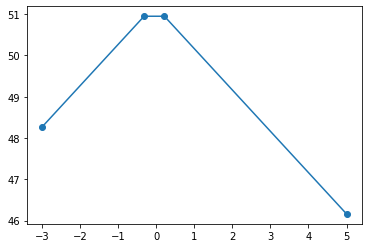

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
ts = np.array(fed.get_transitions(fed.chempot_limits[-1], x_min=-3, x_max=5))
plt.plot(ts[:,0], ts[:,1], "-o")
